# Деревья решений

# Напоминание

Дерево решений — это иерархическая структура, используемая для принятия решений. Каждый внутренний узел представляет собой проверку значения некоторого признака, каждая ветвь представляет собой результат этой проверки, а каждый лист представляет собой класс (в задачах классификации) или значение (в задачах регрессии).


### Дисклеймер

В этом блокноте в качестве критерия информативности будут рассматриваться только энтропия и прирост информации, другие критерии предлагаем рассмотреть самостоятельно.

### Энтропия и прирост информации

Пусть эксперимент $\Omega$ заключается в наступлении событий $\omega_1, \omega_2, \dots, \omega_n$ с вероятностями $p_1, p_2, \dots, p_n$ соответственно.

Энтропией (мерой неопределенности) эксперимента $\Omega$ называют величину

$$
H(\Omega) = - \sum_{i=1}^n p_i \log_2(p_i).
$$

Пусть теперь имеют место 2 эксперимента: $\Omega$ с исходами $\omega_1, \omega_2, \dots, \omega_k$ и $\Sigma$ с исходами $\sigma_1, \sigma_2, \dots, \sigma_n$ и соответствующими вероятностями $p_{ij}$, где $i = \overline{1,k}$, $j = \overline{1,n}$. Тогда энтропией такого эксперимента называется величина

$$
H(\Omega, \Sigma) = -\sum_{i,j}p_{ij} \log_2(p_{ij}).
$$

Условной энтропией эксперимента $\Omega$ при наступлении события $\sigma_j$ называется величина

$$
H(\Omega|\Sigma=\sigma_j) = -\sum_{i=1}^k p_{ij} \log_2(p_{ij}).
$$

Полной условной энтропией в таком случае называется величина

$$
H(\Omega|\Sigma) = \mathbb{E}_{\Sigma}(H(\Omega|\Sigma)) = -\sum_{j=1}^nH(\Omega|\Sigma=\sigma_j)p(\sigma_j).
$$

Прирост информации $\mathsf{IG}(\Omega,\Sigma)$ тогда определяется следующим образом:

$$
\mathsf{IG}(\Omega,\Sigma) = H(\Omega) - H(\Omega|\Sigma).
$$




Понятно, что в случае работы с данными рассматриваемые величины заменяются соответствующими оценками, например, для энтропии будет иметь место следующее выражение

$$
H(\Omega) = - \sum\frac{n_i}{n} \log_2\left(\frac{n_i}{n}\right), \quad \sum\limits_i n_i = n,
$$

где $n_i$ — частота исхода $\omega_i$, $n$ — объем выборки.

# Построение модели

## Подготовка данных

In [1]:
! gdown 10bjx_gm37d2iSnhgYQW1dYmJTmZOp9Nq

zsh:1: command not found: gdown


Загрузим данные, импортируем нужные библиотеки.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
import graphviz

data = pd.read_csv("/content/500_Person_Gender_Height_Weight_Index.csv")
data.head()

ModuleNotFoundError: No module named 'graphviz'

Сразу произведем небольшую подготовительную работу с данными. Перейдем к задаче двухклассовой классификации: все значения `obese` меньше $4$ отнесем к классу $0$, остальные — к классу $1$. Закодируем категориальный признак `Gender`: мужчинам соответствует $1$, женщинам — $0$

In [ ]:
data['obese'] = (data.Index >= 4).astype('int')
data.drop('Index', axis = 1, inplace = True)
data['Gender'] = data['Gender'].replace('Male', 1).replace('Female', 0)
data.head()

<ipython-input-110-77677771f751>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Gender'] = data['Gender'].replace('Male', 1).replace('Female', 0)


,Gender,Height,Weight,obese
0,1,174,96,1
1,1,189,87,0
2,0,185,110,1
3,0,195,104,0
4,1,149,61,0


Разделим набор данных на тренировочную и тестовую выборки

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('obese', axis=1), data['obese'], test_size=0.2, random_state=42, stratify=data['obese'])

#Вывод инфо о данных
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(400, 3) (400,)
(100, 3) (100,)


Посмотрим как распределены объекты по классам

<BarContainer object of 2 artists>

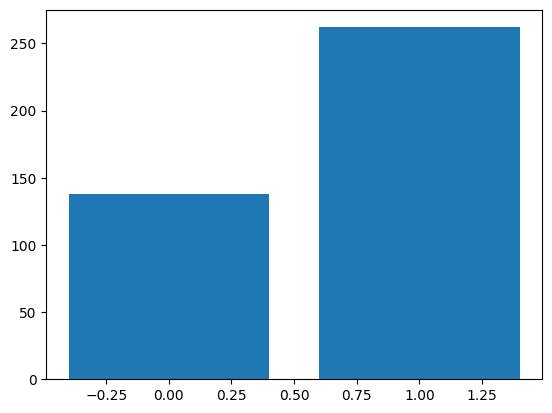

In [ ]:
plt.bar(y_train.unique(), list(y_train.value_counts()))

## Реализация ДПР "с нуля"

### Задача 1: Функция вычисления энтропии

In [ ]:
def get_entropy(y):
    """
    Вычисляет энтропию набора данных.

    Параметры
    ----------
    y : array-like, shape (n_samples,)
        Вектор меток классов.

    Результат
    -------
    entropy : float
        Энтропия набора данных.
    """
    y = np.array(y)
    pass


assert np.isclose(get_entropy(y_train), 0.9295231861792264) and get_entropy([0,0]) == 0 and get_entropy([1,0]) == 1

### Задача 2: Функция вычисления IG

In [ ]:
def get_information_gain(X, y, feature_id, threshold):
    """
    Вычисляет IG (Information Gain) для разбиения набора данных
    по заданному признаку и пороговому значению.

    Параметры
    ----------
    X : array-like, shape (n_samples, n_features)
        Матрица объекты/признаки.
    y : array-like, shape (n_samples,)
        Вектор меток классов.
    feature_id : int
        Индекс признака для разбиения.
    threshold : float
        Пороговое значение для разбиения.

    Результат
    -------
    information_gain : float
        IG для разбиения.
    """
    X = np.array(X)
    y = np.array(y)
    pass

assert np.isclose(get_information_gain(X_train, y_train, 1, 170), 0.04935544674177095)
assert np.isclose(get_information_gain(X_train, y_train, 2, 80), 0.3137754091311502)

### Задача 3: Функция поиска лучшего разбиения

In [ ]:
def find_best_split(X, y):
    """
    Находит наилучший признак и пороговое значение (с точки зрения IG)
    для разбиения набора данных.

    Параметры
    ----------
    X : array-like, shape (n_samples, n_features)
        Матрица объекты/признаки.
    y : array-like, shape (n_samples,)
        Вектор меток классов.

    Результат
    -------
    best_feature_id : int
        Индекс наилучшего признака для разбиения.
    best_threshold : float
        Наилучшее пороговое значение для разбиения.
    """
    X = np.array(X)
    y = np.array(y)
    pass

assert np.isclose(find_best_split(X_test, y_test), (2,104)).all()
assert np.isclose(find_best_split(X_train, y_train), (2,102)).all()

Посмотрим, какие признак и порог дают наилучее значение $\mathsf{IG}$ на первом шаге построение дерева.

In [ ]:
best_feature_id, best_threshold = find_best_split(X_train, y_train)
print("Best feature ID: ", best_feature_id)
print("Best threshold: ", best_threshold)

Best feature ID:  2
Best threshold:  102


### Описание дерева как структуры данных

In [ ]:
class Node:
    """
    Узел дерева решений.

    Атрибуты
    ----------
    feature_id : int
        Индекс признака для разбиения (для внутренних узлов).
    threshold : float
        Пороговое значение для разбиения (для внутренних узлов).
    left : Node
        Левый дочерний узел.
    right : Node
        Правый дочерний узел.
    label : int
        Метка класса (для листьев).
    """
    def __init__(self, feature_id=None, threshold=None, left=None, right=None, label=None):
        self.feature_id = feature_id
        self.threshold = threshold
        self.left = left
        self.right = right
        self.label = label

### Алгоритм построения дерева

1.  Начать с корневого узла, содержащего все обучающие данные.
2.  Выбрать наилучший признак и пороговое значение для разделения данных на два подмножества (узла).
3.  Создать два дочерних узла, соответствующие подмножествам данных, полученным после разбиения.
4.  Рекурсивно повторить шаги 2 и 3 для каждого дочернего узла, пока не будет достигнут критерий остановки (например, максимальная глубина дерева, минимальное количество объектов в узле).
5.  Назначить каждому листу класс (в задачах классификации) или значение (в задачах регрессии), основываясь на большинстве объектов, попавших в этот лист.

In [ ]:
def build_tree(X, y, max_depth=None, min_samples_split=2, depth=0):
    """
    Рекурсивно строит дерево решений.

    Параметры
    ----------
    X : array-like, shape (n_samples, n_features)
        Матрица объекты/признаки.
    y : array-like, shape (n_samples,)
        Вектор меток классов.
    max_depth : int, optional
        Максимальная глубина дерева (по умолчанию None).
    min_samples_split : int, optional
        Минимальное количество объектов, необходимое для разделения узла (по умолчанию 2).
    depth : int
        Текущая глубина дерева (используется для контроля max_depth)

    Результат
    -------
    tree : Node
        Корень построенного дерева решений.
    """

    X = np.array(X)
    y = np.array(y)

    # Проверка критериев остановки

    #Если достигнута максимальная глубина
    if max_depth is not None and depth >= max_depth:
        #Создаем листовой узел с лейблом, соответсвующим наиболее частому классу
        label = Counter(y).most_common(1)[0][0]
        return Node(label=label)

    #Если кол-во элементов в узле меньше минимального для разбиения
    if len(y) <= min_samples_split:
        label = Counter(y).most_common(1)[0][0]
        return Node(label=label)

    #Если в узле остался только один класс
    if len(np.unique(y)) == 1:
        return Node(label=y[0])

    # Выбор лучшего разбиения
    best_feature_id, best_threshold = find_best_split(X, y)

    # Создание дочерних узлов

    # Если не нашли чем делить, то возвращаем листовой узел
    if best_feature_id is None:
        label = Counter(y).most_common(1)[0][0]
        return Node(label=label)

    #Создаем маски на основе лучшего признака и порога
    left_indices = X[:, best_feature_id] <= best_threshold
    right_indices = X[:, best_feature_id] > best_threshold

    #Если получилось так, что один из узлов пустой, то возвращаем листовой узел
    if len(y[left_indices]) == 0 or len(y[right_indices]) == 0:
        label = Counter(y).most_common(1)[0][0]
        return Node(label=label)

    #Делим матрицу объекты-признаки и вектор ответов на 2 части
    X_left, y_left = X[left_indices], y[left_indices]
    X_right, y_right = X[right_indices], y[right_indices]

    #И рекурсивно вызываем ф-ю для левого и правого узла
    left = build_tree(X_left, y_left, max_depth, min_samples_split, depth + 1)
    right = build_tree(X_right, y_right, max_depth, min_samples_split, depth + 1)

    # Создание узла и возврат
    return Node(feature_id=best_feature_id, threshold=best_threshold, left=left, right=right)

Создадим дерево заданной глубины

In [ ]:
max_depth = 5

tree = build_tree(X_train, y_train, max_depth = max_depth)

### Задача 4: Функция прохода по дереву для предсказания ответа

In [ ]:
def predict(tree, x):
    """
    Предсказывает метку класса для одного объекта.

    Параметры
    ----------
    tree : Node - корень (узел) дерева
    x : array-like, shape (n_features,)
        Вектор признаков объекта.

    Результат
    -------
    label : int
        Предсказанная метка класса.
    """
    x = np.array(x)
    pass

assert predict(tree, X_test.iloc[0]) == 1 and predict(tree, X_test.iloc[3]) == 0

In [ ]:
def test_predictions(tree, X_test):
    """
    Предсказание для всего тестового набора
    """
    X_test = np.array(X_test)
    return [predict(tree, x) for x in X_test]

In [ ]:
#Оценка точности
accuracy_score(y_test, test_predictions(tree, X_test))

## Библиотечная реализация

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
model = DecisionTreeClassifier(max_depth = max_depth, criterion='entropy')
model.fit(X_train, y_train)
accuracy_score(y_test, model.predict(X_test))

Можно сравнить полученные деревья (наша и библиотечная реализация)

In [ ]:
print('Порог: ', tree.threshold)
print('Фича: ', X_train.columns[tree.feature_id])

Порог:  102
Фича:  Weight


In [ ]:
print('Порог: ', tree.left.left.right.threshold)
print('Фича: ', X_train.columns[tree.left.left.right.feature_id])

In [ ]:
print('Порог: ', tree.right.left.right.threshold)
print('Фича: ', X_train.columns[tree.right.left.right.feature_id])

In [ ]:
dot_data = export_graphviz(model, out_file=None,
                           feature_names=data.columns[:-1],
                           class_names=['0', '1'],
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph

### Feature importance

На основе вклада конкретного признака в увеличение IG можно оценивать важность признаков.

Пусть $n$ — общее число объектов, $n_{node}$ — число объектов, пришедших в узел $node$, $f_{node}$ — прирост информации при использовании признака $f$ в узле $node$. Тогда вклад этого узла в важность признака $f$ определяется как

$$
\frac{n_{node}}{n} \cdot IG(f_{node}).
$$

Далее для каждого признака суммируются все вклады IG, которые были получены при использовании этого признака во всех узлах дерева. После чего важности нормируются. В результате важность признака $f$ определяется следующим образом:

$$
FI(f) = \frac{\sum_{node|f_{node} = f}\frac{n_{node}}{n} \cdot IG(f_{node})}{\sum_{node} \frac{n_{node}}{n} \cdot IG(f_{node})}.
$$

In [ ]:
feature_importances = model.feature_importances_

# Создаем DataFrame для удобства визуализации
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Сортируем признаки по важности
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Визуализируем
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

На что влияет глубина?

In [ ]:
def calculate_metrics(max_depth, X_train = X_train, y_train = y_train, X_test= X_test, y_test=y_test):
    model = DecisionTreeClassifier(max_depth = max_depth)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

metrics_arr = [calculate_metrics(max_depth) for max_depth in range(1,14)]
plt.plot(metrics_arr)
plt.xlabel('Depth')
plt.ylabel('Accuracy')


# BMI

[BMI](https://ru.wikipedia.org/wiki/%D0%98%D0%BD%D0%B4%D0%B5%D0%BA%D1%81_%D0%BC%D0%B0%D1%81%D1%81%D1%8B_%D1%82%D0%B5%D0%BB%D0%B0) — величина, позволяющая оценить степень соответствия массы человека и его роста и тем самым косвенно судить о том, является ли масса недостаточной, нормальной или избыточной. Определяется следующим образом:

$$
\textbf{BMI}(h,w) = \frac{w}{h^2},
$$

где $h$ — рост в м, $w$ — вес в кг

Добавим признак BMI в рассмотрение.

In [ ]:
data['BMI'] = data['Weight'] / (data['Height']/100)**2
data

,Gender,Height,Weight,obese,BMI
0,1,174,96,1,31.708284
1,1,189,87,0,24.355421
2,0,185,110,1,32.140248
3,0,195,104,0,27.350427
4,1,149,61,0,27.476240
...,...,...,...,...,...
495,0,150,153,1,68.000000
496,0,184,121,1,35.739603
497,0,141,136,1,68.407022
498,1,150,95,1,42.222222


In [ ]:
# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(data.drop('obese', axis=1), data['obese'], test_size=0.2, random_state=42, stratify=data['obese'])

In [ ]:
model = DecisionTreeClassifier(max_depth = 5, criterion='entropy')
model.fit(X_train, y_train)
accuracy_score(y_test, model.predict(X_test))

In [ ]:
from sklearn.tree import export_graphviz
import graphviz
dot_data = export_graphviz(model, out_file=None,
                           feature_names=X_train.columns,
                           class_names=['0', '1'],
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [ ]:
feature_importances = model.feature_importances_

# Создаем DataFrame для удобства визуализации
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Сортируем признаки по важности
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Визуализируем
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
model = DecisionTreeClassifier(max_depth = 1, criterion='entropy')
model.fit(X_train, y_train)
accuracy_score(y_test, model.predict(X_test))

In [ ]:
dot_data = export_graphviz(model, out_file=None,
                           feature_names=X_train.columns,
                           class_names=['0', '1'],
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph

# Вопросы для обсуждения

1. Недостатки с точки зрения вычислительной сложности
2. Виды подрезки (pruning): `pre-pruning` vs `post-pruning`. А как в `sklearn` (`max_depth` & `min_samples_split` & `min_samples_leaf` vs `ccp_alpha`?
3. Как еще можно выбирать фичу и порог (сейчас используем все уникальные значения и жадный алгоритм)?
4. Что насчет масштабирования признаков?
5. Что насчет переобучения?
6. Что с интерпретируемостью?
7. В целом как можно охарактеризовать алгоритм с точки зрения использования эвристик?

Дополнительную информацию можно почепнуть еще [вот тут](https://education.yandex.ru/handbook/ml/article/reshayushchiye-derevya)
